In [1]:
import pandas as pd
from scipy.io import loadmat
address= 'C:\\Users\\behtu\\URI_Backup\\1.NeuroLab\Database\\Auditory Oddball Data\\Shared_Oddball_Raw\\Mat Files\\H_SO_00\\auditory_R01.mat'
auditoryS1R1 = pd.DataFrame(loadmat(address)['signal'])

**Filtering**

In [2]:
from scipy.signal import iirnotch ,filtfilt, butter , sosfiltfilt

def design_notch_filter(notch_freq, quality_factor, fs):
    nyq = 0.5 * fs
    freq = notch_freq / nyq
    b, a = iirnotch(freq, quality_factor)
    return b, a

# Example usage
fs = 256  # Sample rate, Hz
notch_freq = 60  # Notch frequency, Hz
quality_factor = 30  # Quality factor
b_notch, a_notch = design_notch_filter(notch_freq, quality_factor, fs)

In [3]:
df = pd.DataFrame(auditoryS1R1)
raw_signal = df.iloc[:,0:15]
raw_signal.shape

(103424, 15)

In [4]:
notchfiltered_signal = filtfilt(b_notch, a_notch, raw_signal.T)

Pandpass

In [5]:
def design_bandpass_filter(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs  # Nyquist Frequency
    low = lowcut / nyq
    high = highcut / nyq
    sos = butter(order, [low, high], btype='band',output='sos')
    return sos

# Example usage
fs = 256  # Sample rate, Hz
lowcut = 0.5  # Low cut-off frequency, Hz
highcut = 55  # High cut-off frequency, Hz
sos = design_bandpass_filter(lowcut, highcut, fs, order=4)

In [6]:
df = pd.DataFrame(notchfiltered_signal)
butter_filtered = sosfiltfilt(sos,df)
butterfiltred = pd.DataFrame(butter_filtered)
butterfiltered = butterfiltred.T
butterfiltered.describe()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
count,103424.000000,103424.000000,103424.000000,103424.000000,103424.000000,103424.000000,103424.000000,103424.000000,103424.000000,103424.000000,103424.000000,103424.000000,103424.000000,103424.000000,103424.000000
mean,0.003840,0.001797,0.002435,-0.001244,-0.000762,0.001430,0.001168,0.001843,0.001921,0.000290,0.003571,0.001100,0.003144,0.002548,0.002659
std,18.279651,12.909631,11.819564,10.617596,10.369259,10.349226,9.313858,10.166438,9.242897,7.377438,8.917169,6.201931,9.505323,8.526321,11.863687
min,-96.735798,-68.684212,-64.153123,-73.098801,-47.310906,-54.887091,-46.473398,-53.328092,-55.880922,-45.542269,-54.808911,-36.304462,-67.805212,-62.417245,-71.303957
25%,-7.236291,-6.901737,-6.690538,-6.059113,-6.635340,-6.499181,-5.830898,-6.533074,-5.733346,-4.686962,-5.572036,-3.932352,-5.962975,-5.148209,-7.433787
50%,-0.354638,-0.278644,-0.297359,-0.170864,-0.113221,-0.054662,-0.092477,0.006064,-0.068598,-0.036243,-0.033662,-0.048336,0.056571,0.105107,0.151357
75%,6.320250,6.360926,6.325809,5.728278,6.443700,6.360491,5.683894,6.484574,5.615962,4.617470,5.475893,3.855494,6.048650,5.327606,7.675053
max,127.643024,83.867104,85.127728,64.874979,54.687945,59.451141,57.939712,50.387169,46.991663,35.600623,44.355716,31.685183,49.555528,46.808128,66.368522


In [7]:
stimulusCode = auditoryS1R1.iloc[:,32]
stimulusCode = pd.DataFrame(stimulusCode)
stimulusCode.describe()

,32
count,103424.000000
mean,0.207921
std,0.462814
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,2.000000


In [8]:
#stimulusCode.resample(32.768)

In [9]:
butterfiltered = pd.merge(butterfiltered, stimulusCode, left_index=True,right_index=True)
butterfiltered.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,32
count,103424.000000,103424.000000,103424.000000,103424.000000,103424.000000,103424.000000,103424.000000,103424.000000,103424.000000,103424.000000,103424.000000,103424.000000,103424.000000,103424.000000,103424.000000,103424.000000
mean,0.003840,0.001797,0.002435,-0.001244,-0.000762,0.001430,0.001168,0.001843,0.001921,0.000290,0.003571,0.001100,0.003144,0.002548,0.002659,0.207921
std,18.279651,12.909631,11.819564,10.617596,10.369259,10.349226,9.313858,10.166438,9.242897,7.377438,8.917169,6.201931,9.505323,8.526321,11.863687,0.462814
min,-96.735798,-68.684212,-64.153123,-73.098801,-47.310906,-54.887091,-46.473398,-53.328092,-55.880922,-45.542269,-54.808911,-36.304462,-67.805212,-62.417245,-71.303957,0.000000
25%,-7.236291,-6.901737,-6.690538,-6.059113,-6.635340,-6.499181,-5.830898,-6.533074,-5.733346,-4.686962,-5.572036,-3.932352,-5.962975,-5.148209,-7.433787,0.000000
50%,-0.354638,-0.278644,-0.297359,-0.170864,-0.113221,-0.054662,-0.092477,0.006064,-0.068598,-0.036243,-0.033662,-0.048336,0.056571,0.105107,0.151357,0.000000
75%,6.320250,6.360926,6.325809,5.728278,6.443700,6.360491,5.683894,6.484574,5.615962,4.617470,5.475893,3.855494,6.048650,5.327606,7.675053,0.000000
max,127.643024,83.867104,85.127728,64.874979,54.687945,59.451141,57.939712,50.387169,46.991663,35.600623,44.355716,31.685183,49.555528,46.808128,66.368522,2.000000


In [10]:
eeg_ch_names = [
            'Fpz',
            'AFz',
            'F5',
            'F6',
            'FCz',
            'FC3',
            'FC4',
            'Cz',
            'C5',
            'C6',
            'TTP7',
            'TTP8',
            'TPP7',
            'TPP8',
            'Pz',
            'StimulusCode'
]
butterfiltered.columns = eeg_ch_names
butterfiltered.describe()

,Fpz,AFz,F5,F6,FCz,FC3,FC4,Cz,C5,C6,TTP7,TTP8,TPP7,TPP8,Pz,StimulusCode
count,103424.000000,103424.000000,103424.000000,103424.000000,103424.000000,103424.000000,103424.000000,103424.000000,103424.000000,103424.000000,103424.000000,103424.000000,103424.000000,103424.000000,103424.000000,103424.000000
mean,0.003840,0.001797,0.002435,-0.001244,-0.000762,0.001430,0.001168,0.001843,0.001921,0.000290,0.003571,0.001100,0.003144,0.002548,0.002659,0.207921
std,18.279651,12.909631,11.819564,10.617596,10.369259,10.349226,9.313858,10.166438,9.242897,7.377438,8.917169,6.201931,9.505323,8.526321,11.863687,0.462814
min,-96.735798,-68.684212,-64.153123,-73.098801,-47.310906,-54.887091,-46.473398,-53.328092,-55.880922,-45.542269,-54.808911,-36.304462,-67.805212,-62.417245,-71.303957,0.000000
25%,-7.236291,-6.901737,-6.690538,-6.059113,-6.635340,-6.499181,-5.830898,-6.533074,-5.733346,-4.686962,-5.572036,-3.932352,-5.962975,-5.148209,-7.433787,0.000000
50%,-0.354638,-0.278644,-0.297359,-0.170864,-0.113221,-0.054662,-0.092477,0.006064,-0.068598,-0.036243,-0.033662,-0.048336,0.056571,0.105107,0.151357,0.000000
75%,6.320250,6.360926,6.325809,5.728278,6.443700,6.360491,5.683894,6.484574,5.615962,4.617470,5.475893,3.855494,6.048650,5.327606,7.675053,0.000000
max,127.643024,83.867104,85.127728,64.874979,54.687945,59.451141,57.939712,50.387169,46.991663,35.600623,44.355716,31.685183,49.555528,46.808128,66.368522,2.000000


array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

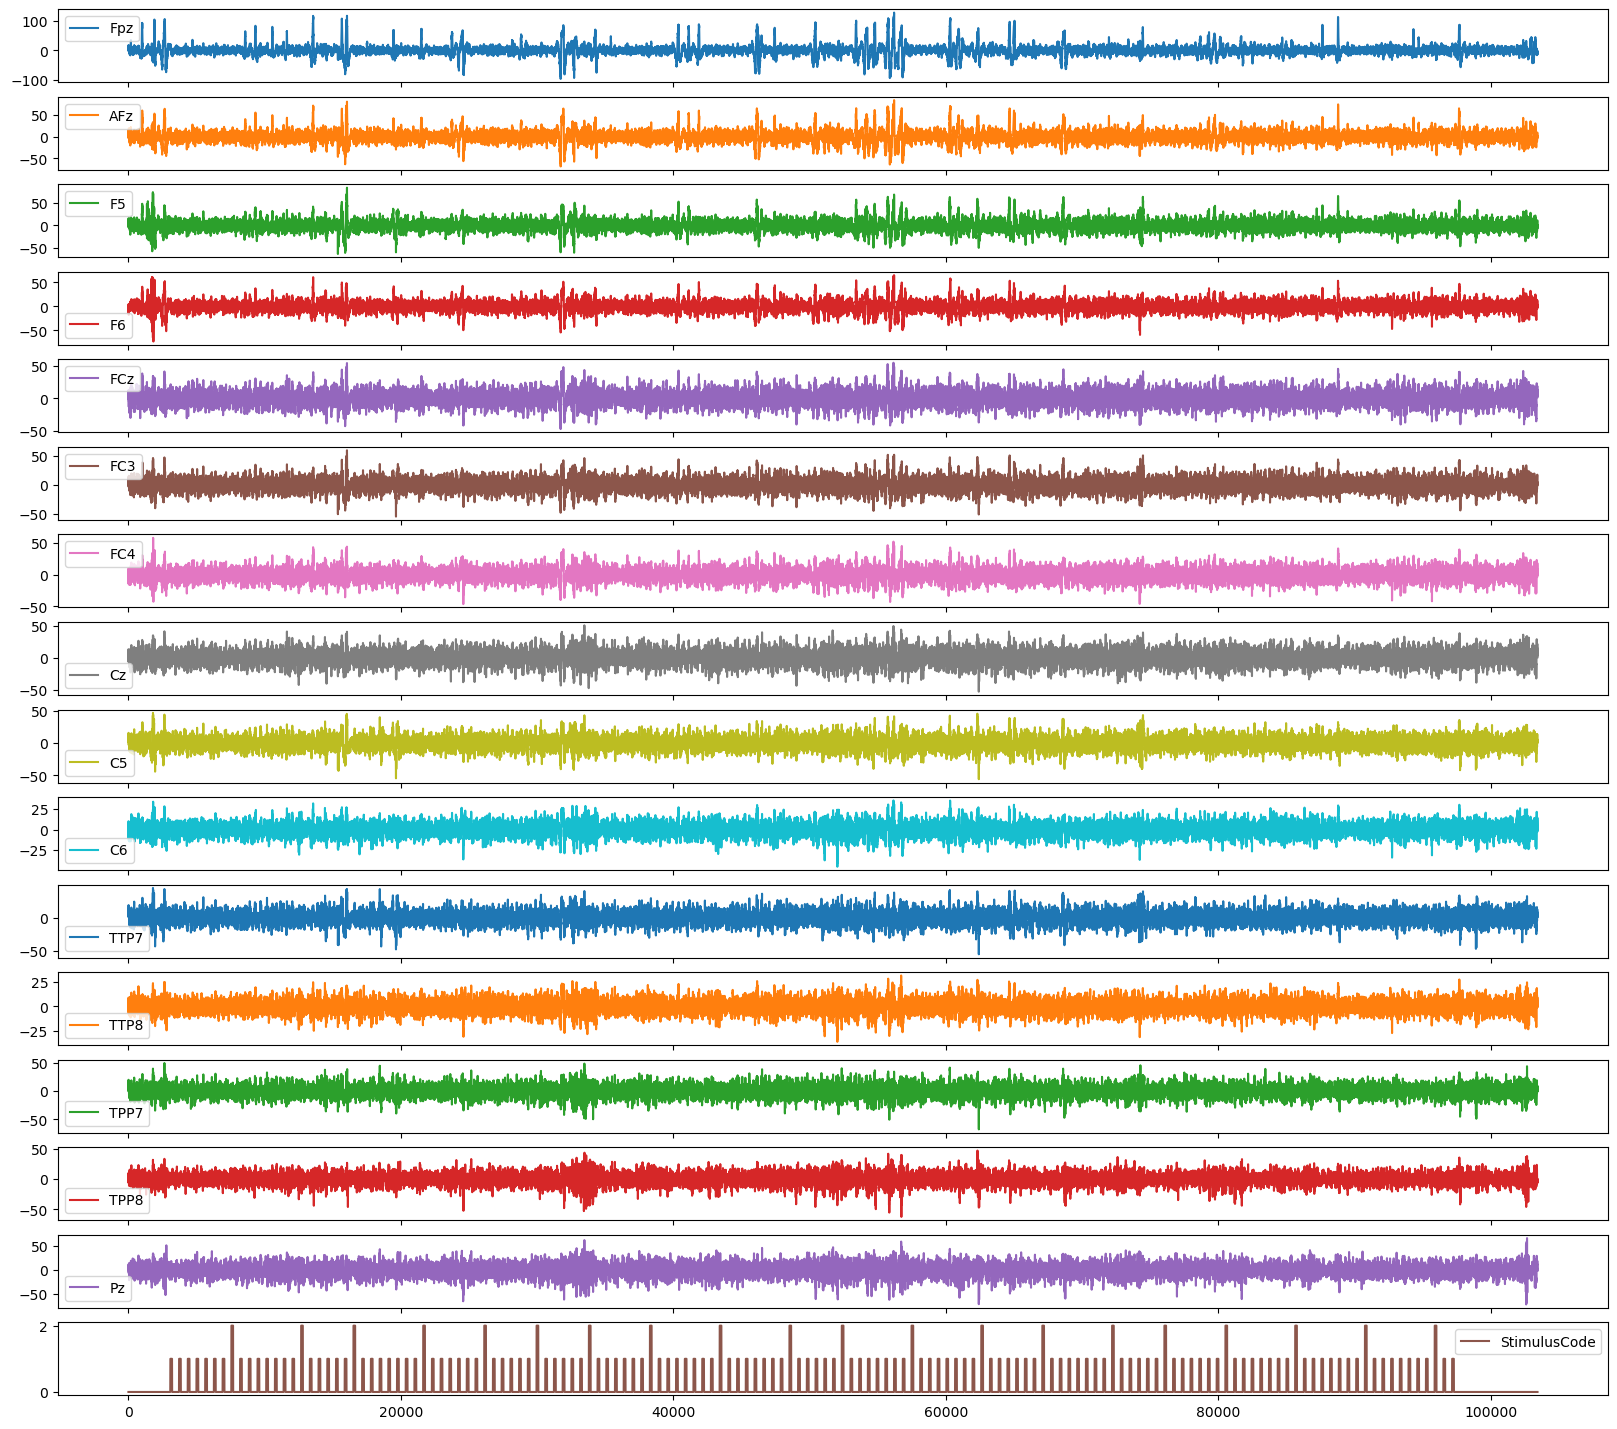

In [11]:
import matplotlib.pyplot as plt
#Averaged=butterfiltered.groupby(by=['stimulusCode']).mean()

butterfiltered.plot.line(subplots=True,figsize=(20,18))


In Case of conflicting dll files

In [12]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

### Importing Dataframe into MNE
Adding Channels and channel montage for top view of electrodes 
Filtering raw EEG between 1 and 30 hertz with an FIR badpass filter


In [13]:
import mne
import numpy as np

In [14]:
mne.channels.get_builtin_montages(descriptions=False)

['standard_1005',
 'standard_1020',
 'standard_alphabetic',
 'standard_postfixed',
 'standard_prefixed',
 'standard_primed',
 'biosemi16',
 'biosemi32',
 'biosemi64',
 'biosemi128',
 'biosemi160',
 'biosemi256',
 'easycap-M1',
 'easycap-M10',
 'easycap-M43',
 'EGI_256',
 'GSN-HydroCel-32',
 'GSN-HydroCel-64_1.0',
 'GSN-HydroCel-65_1.0',
 'GSN-HydroCel-128',
 'GSN-HydroCel-129',
 'GSN-HydroCel-256',
 'GSN-HydroCel-257',
 'mgh60',
 'mgh70',
 'artinis-octamon',
 'artinis-brite23',
 'brainproducts-RNP-BA-128']

<DigMontage | 0 extras (headshape), 0 HPIs, 3 fiducials, 343 channels>
4 duplicate electrode labels found:
T7/T3, T8/T4, P7/T5, P8/T6
Plotting 339 unique labels.


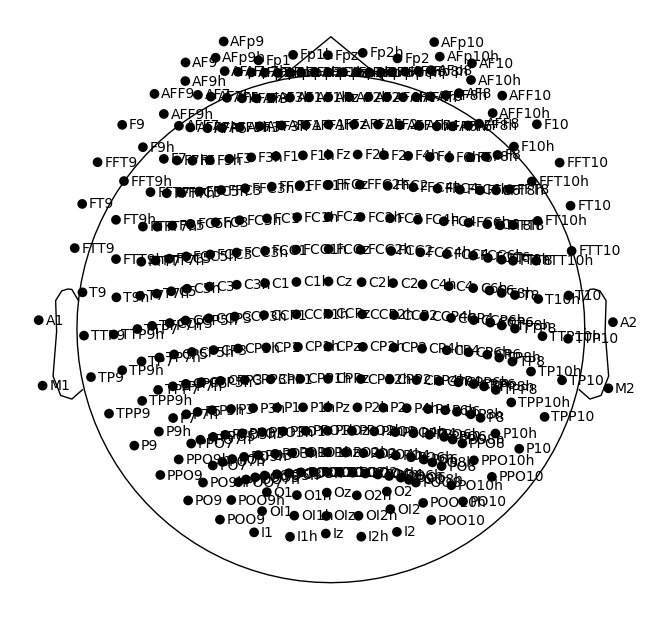

4 duplicate electrode labels found:
T7/T3, T8/T4, P7/T5, P8/T6
Plotting 339 unique labels.


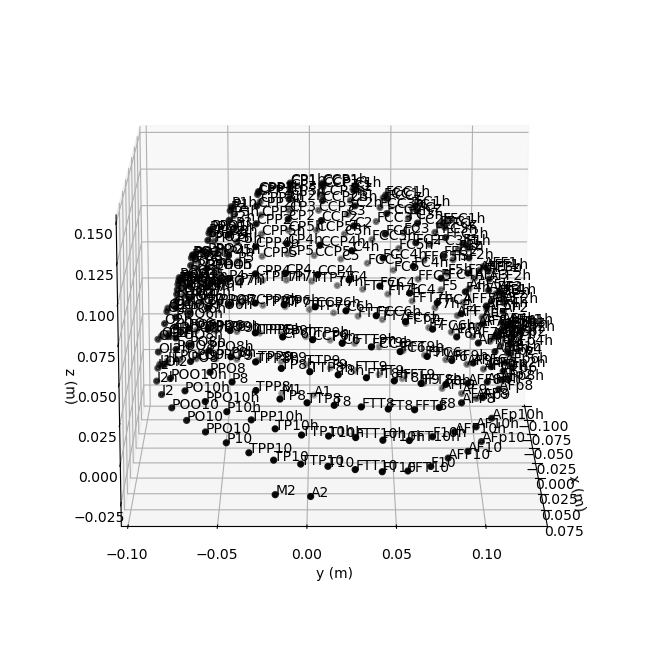

In [15]:
easycap_montage = mne.channels.make_standard_montage("standard_1005")
print(easycap_montage)
easycap_montage.plot()  # 2D
fig = easycap_montage.plot(kind="3d", show=False)  # 3D
fig = fig.gca().view_init(azim=-1800, elev=15)  # set view angle for tutorial

In [16]:
print([s for s in easycap_montage.ch_names if 'TPP' in s])

['TPP9h', 'TPP7h', 'TPP8h', 'TPP10h', 'TPP9', 'TPP7', 'TPP8', 'TPP10']


In [17]:
n_channels = 16
sampling_freq = 256  # in Hertz
ch_names = [
            'Fpz',
            'AFz',
            'F5',
            'F6',
            'FCz',
            'FC3',
            'FC4',
            'Cz',
            'C5',
            'C6',
            'TTP7',
            'TTP8',
            'TPP7',
            'TPP8',
            'Pz',
            'StimulusCode']
ch_types = ['eeg']*15+['stim']*1
info = mne.create_info(ch_names, ch_types=ch_types, sfreq=sampling_freq)
#info.montage=mne.channels.read_custom_montage('eloc64.txt')
info.set_montage('standard_1005')
raw = mne.io.RawArray(butterfiltered.T, info)


Creating RawArray with float64 data, n_channels=16, n_times=103424
    Range : 0 ... 103423 =      0.000 ...   403.996 secs
Ready.


*Very IMPORTANT CHANGE IN THE MNE ! / MNE WORKS WITH VOLTS!!!*

In [18]:
raw.apply_function(lambda x: x*1e-6, picks="eeg")

<RawArray | 16 x 103424 (404.0 s), ~12.6 MiB, data loaded>

In [19]:
ssp_projectors = raw.info["projs"]
raw.del_proj()

<RawArray | 16 x 103424 (404.0 s), ~12.6 MiB, data loaded>

In [20]:
eeg_channels = mne.pick_types(raw.info, eeg=True)
colorDict = { 
            'Fpz': 'darkblue',
            'AFz':'green',
            'F5':'red',
            'F6':'blue',
            'FCz':'steelblue',
            'FC3':'m',
            'FC4':'red',
            'Cz':'green',
            'C5':'darkblue',
            'C6':'darkgreen',
            'TTP7':'red',
            'TTP8':'steelblue',
            'TPP7':'yellow',
            'TPP8':'red',
            'Pz':'blue',
            'StimulusCode':'k'
}
mne.set_config('MNE_BROWSE_RAW_SIZE','16,8') 
# raw.plot(duration=400, order=eeg_channels, n_channels=len(eeg_channels),color=dict(eeg='steelblue'), bad_color='lightgray', event_color='cyan', remove_dc=False,scalings=dict(eeg='100e-6'));

Using matplotlib as 2D backend.


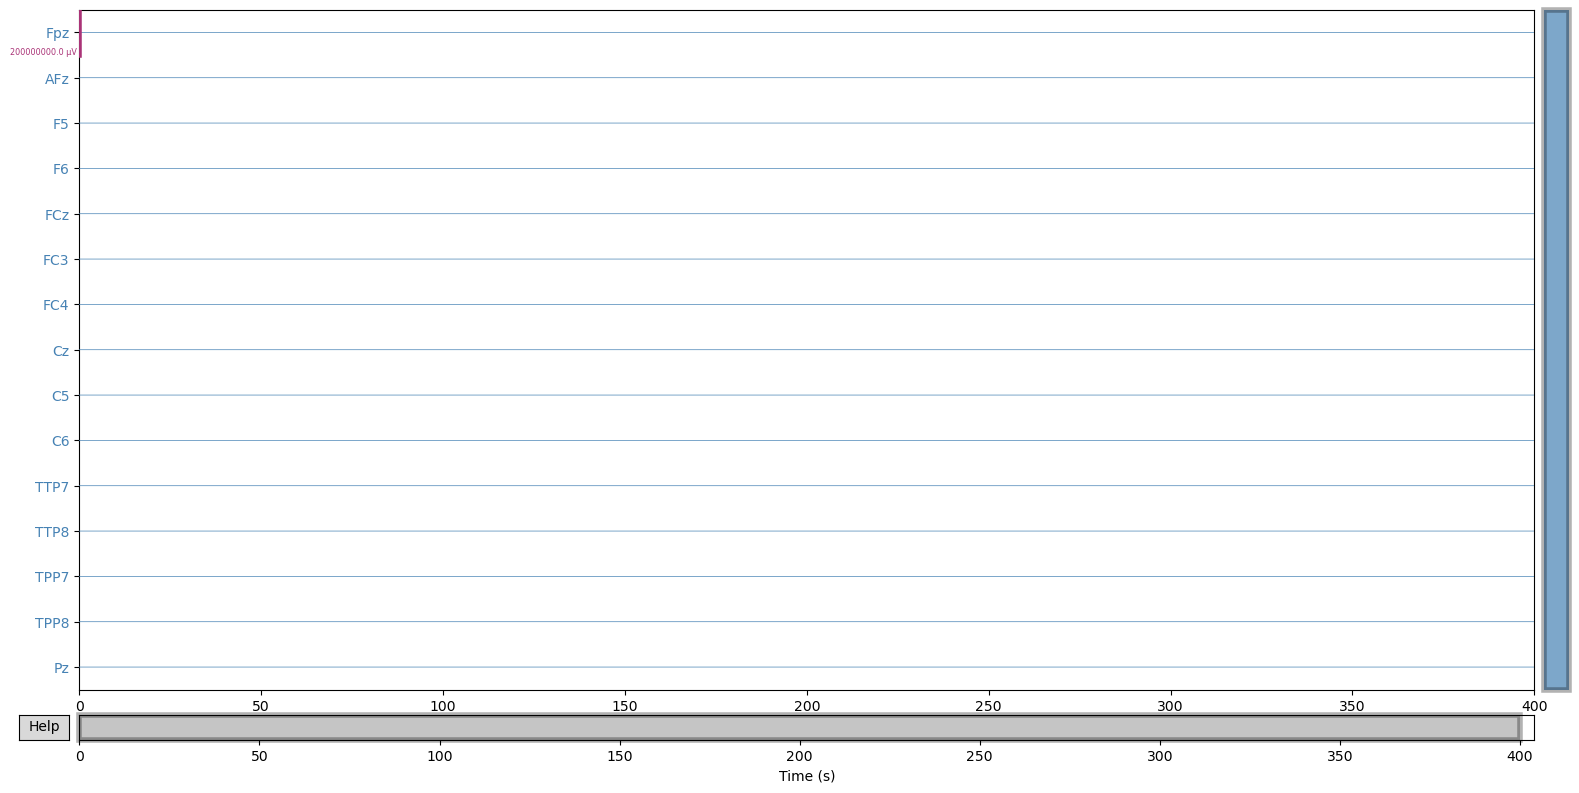

In [21]:
raw.plot(duration=400, order=eeg_channels, n_channels=len(eeg_channels),color=dict(eeg='steelblue'), bad_color='lightgray', event_color='cyan', remove_dc=False,scalings=dict(eeg='100'));

**Power line noise**

Effective window size : 8.000 (s)
Plotting power spectral density (dB=True).


c:\Users\behtu\anaconda3\envs\tf\Lib\site-packages\mne\viz\utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


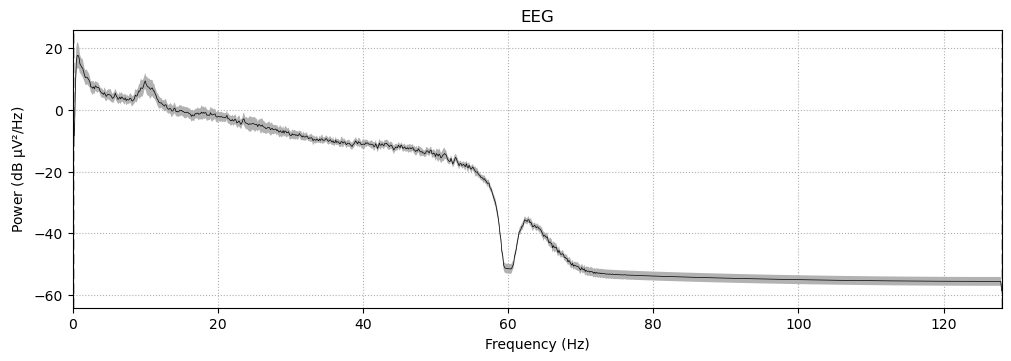

In [22]:
fig = raw.compute_psd(tmax=np.inf, fmax=128).plot(
    average=True, amplitude=False, picks="data", exclude="bads"
)
# add some arrows at 60 Hz and its harmonics:
for ax in fig.axes[1:]:
    freqs = ax.lines[-1].get_xdata()
    psds = ax.lines[-1].get_ydata()
    for freq in (60, 120, 180, 240):
        idx = np.searchsorted(freqs, freq)
        ax.arrow(
            x=freqs[idx],
            y=psds[idx] + 18,
            dx=0,
            dy=-12,
            color="red",
            width=0.1,
            head_width=3,
            length_includes_head=True,
        )

In [23]:
print(raw.info["bads"])

[]


In [24]:
from mne.preprocessing import ICA, corrmap, create_ecg_epochs, create_eog_epochs

Bandpass Filtering

In [25]:
# raw_filtered=raw.filter(1, 40., fir_design='firwin', skip_by_annotation='edge')

In [26]:
# pick some channels that clearly show heartbeats and blinks
regexp = r"([Fpz]|[F5]|[F6])"
artifact_picks = mne.pick_channels_regexp(raw.ch_names, regexp=regexp)
# raw.plot(order=artifact_picks, show_scrollbars=True,duration = 404,scalings=dict(eeg=100e-6));

In [27]:
from mne.preprocessing import ICA, corrmap, create_ecg_epochs, create_eog_epochs
ica = ICA(n_components=15,method='infomax',fit_params=dict(extended=True), max_iter='auto' , random_state=24)
ica.fit(raw)#reject = dict(eeg=40e-6)
ica

Fitting ICA to data using 15 channels (please be patient, this may take a while)
Selecting by number: 15 components
Computing Extended Infomax ICA


C:\Users\behtu\AppData\Local\Temp\ipykernel_48792\4270200373.py:3: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)#reject = dict(eeg=40e-6)


Fitting ICA took 5.7s.


Method,infomax
Fit parameters,extended=Truemax_iter=500
Fit,500 iterations on raw data (103424 samples)
ICA components,15
Available PCA components,15
Channel types,eeg
ICA components marked for exclusion,—


In [28]:
explained_var_ratio = ica.get_explained_variance_ratio(raw)
for channel_type, ratio in explained_var_ratio.items():
    print(
        f"Fraction of {channel_type} variance explained by all components: " f"{ratio}"
    )

Fraction of eeg variance explained by all components: 1.0


In [29]:
explained_var_ratio = ica.get_explained_variance_ratio(
    raw, components=[1], ch_type="eeg"
)
# This time, print as percentage.
ratio_percent = round(100 * explained_var_ratio["eeg"])
print(
    f"Fraction of variance in EEG signal explained by first component: "
    f"{ratio_percent}%"
)

Fraction of variance in EEG signal explained by first component: 9%


In [30]:
# raw.load_data()
# ica.plot_sources(raw, show_scrollbars=False,start =250 , stop = 300);

In [31]:
# ica.plot_components();

In [32]:
# ica.plot_properties(raw, picks=[0, 1]);

In [33]:
# %% Retrieve explained variance
# unitize variances explained by PCA components, so the values sum to 1
pca_explained_variances = ica.pca_explained_variance_ / ica.pca_explained_variance_.sum()
ica_explained_variances = pca_explained_variances[:ica.n_components_]
for idx, var in enumerate(ica_explained_variances):
    print(
        f'Explained variance for ICA component {idx}: '
        f'{round(100 * var, 1)}%'
    )

Explained variance for ICA component 0: 62.5%
Explained variance for ICA component 1: 19.0%
Explained variance for ICA component 2: 7.3%
Explained variance for ICA component 3: 4.2%
Explained variance for ICA component 4: 2.2%
Explained variance for ICA component 5: 1.6%
Explained variance for ICA component 6: 1.0%
Explained variance for ICA component 7: 0.7%
Explained variance for ICA component 8: 0.4%
Explained variance for ICA component 9: 0.3%
Explained variance for ICA component 10: 0.2%
Explained variance for ICA component 11: 0.2%
Explained variance for ICA component 12: 0.2%
Explained variance for ICA component 13: 0.1%
Explained variance for ICA component 14: 0.1%


In [35]:
# ica.apply() changes the Raw object in-place, so let's make a copy first:
reconst_raw = raw.copy()
ica.apply(reconst_raw)

# raw.plot(
#     order=artifact_picks, n_channels=len(artifact_picks), show_scrollbars=False,color=dict(eeg='steelblue'),
#     bad_color='lightgray', event_color='cyan', remove_dc=False,scalings=dict(eeg='100e-6'),
#     start = 250 , duration= 50
#  )

# fig2=reconst_raw.plot(
#     order=artifact_picks, n_channels=len(artifact_picks), show_scrollbars=False,
#     color=dict(eeg='steelblue'), bad_color='lightgray', event_color='cyan', remove_dc=False,scalings=dict(eeg='100e-6'),
#     start = 250 , duration= 50,
#     title='After ICA'
# )

Applying ICA to Raw instance
    Transforming to ICA space (15 components)
    Zeroing out 2 ICA components
    Projecting back using 15 PCA components


<RawArray | 16 x 103424 (404.0 s), ~12.6 MiB, data loaded>

In [36]:
# ic_idx = [2,3,4,5,6, 7, 8, 9, 10, 11, 12, 13, 14]
# ica.plot_properties(raw, picks=ic_idx, log_scale=True,psd_args={'fmax': 35.})


In [37]:
# ica2 = ICA(n_components=15,method='infomax',fit_params=dict(extended=True), max_iter='auto' , random_state=24)
# ica2.fit(reconst_raw)#reject = dict(eeg=40e-6)
# ica2

In [38]:
# muscle_idx_auto, scores = ica2.find_bads_muscle(reconst_raw)
# ica2.plot_scores(scores, exclude=muscle_idx_auto)
# print(
#     f"Manually found muscle artifact ICA components:      {muscle_idx_auto}\n"
#     f"Automatically found muscle artifact ICA components: {muscle_idx_auto}"
# )

In [39]:
# components_to_exclude = list(range(13))
# ica.exclude = components_to_exclude
# ica_sources = ica.get_sources(raw).copy()
# ica_sources_filtered = ica_sources .filter(l_freq=None, h_freq=25)

# raw_reconstructed_noemg = raw.copy()
# ica_sources_filtered.apply(raw_reconstructed_noemg)
# muscle_idx = [13, 14]
# ica_sources_filtered.plot_sources(raw, show_scrollbars=False,start =250 , stop = 300);
# #ica_sources_filtered.plot_properties(raw, picks=muscle_idx, log_scale=True)

states.StimulusCode = 1 corresponds with standard stimuli (1 kHz tones, 500ms duration)

states.StimulusCode = 2 corresponds with deviant stimuli (40 Hz white noise click trains, 500ms duration)

In [40]:

#event_id = dict(c1=1, c2=2, c3=3,c4=4,c5=5,c6=6,r1=7,r2=8,r3=9,r4=10,r5=11,r6=12)
#mapping = {1: 'Column1', 2: 'Column2',3:'Column3',4:'Column4',5:'Column5',6:'Column6',
#            7:'Row1',8:'Row2',9:'Row3',10:'Row4',11:'Row5',12:'Row6'}

tmin, tmax = -0.5, 1.5
event_id = dict(
    deviant40=2,
    standard1k=1
    )
mapping={2:'deviant40',
         1:'standard1k'
         }
#raw.set_eeg_reference("average")
events = mne.find_events(reconst_raw, stim_channel=['StimulusCode'])

onsets = events[:, 0] / reconst_raw.info['sfreq']
durations = np.zeros_like(onsets) 
descriptions = [mapping[event_id] for event_id in events[:, 2]]
annot_from_events = mne.Annotations(onset=onsets, duration=durations,
                                    description=descriptions,
                                    orig_time=reconst_raw.info['meas_date'])
reconst_raw.set_annotations(annot_from_events)

picks = mne.pick_types(reconst_raw.info, meg=False, eeg=True, stim=False, eog=False)

epochs = mne.Epochs(reconst_raw, events, event_id, tmin, tmax, proj=True, picks=picks,
                baseline=None, preload=True) #event_repeated='merge'

labels = epochs.events[:, -1]
epochs.events[:, -1]

picks_with_stim = mne.pick_types(reconst_raw.info, meg=False, eeg=True, stim=True, eog=False)

epochs_with_stim = mne.Epochs(reconst_raw, events, event_id, tmin, tmax, proj=True, picks=picks_with_stim,
                baseline=None, preload=True) #event_repeated='merge'


148 events found on stim channel StimulusCode
Event IDs: [1 2]
Not setting metadata
148 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 148 events and 513 original time points ...
0 bad epochs dropped
Not setting metadata
148 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 148 events and 513 original time points ...
0 bad epochs dropped


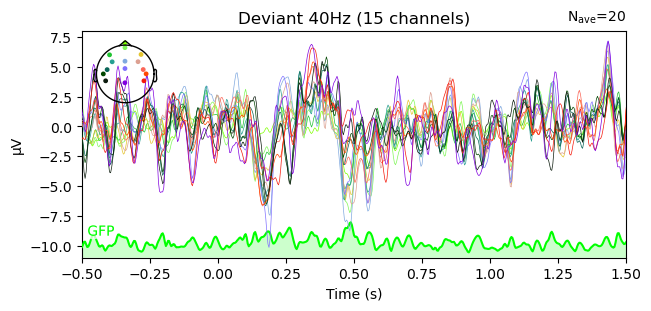

In [41]:
l_40 = epochs["deviant40"].average()
l_1k = epochs["standard1k"].average()
l_40.plot(titles='Deviant 40Hz',gfp=True);

# l_1k.plot(picks="eeg", spatial_colors=True, gfp=True,titles='Standard 1 kHz');